In [1]:
import os
import sys
module_path = os.path.abspath("/home/neurobook/Desktop/Research/_dev/conic-tools/")
sys.path.insert(0, module_path)
module_path = os.path.abspath("/home/neurobook/Desktop/Research/_dev/PySpike/")
sys.path.insert(0, module_path)

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import conic_tools

In [4]:
## Load Data
# Condition 1
with open("./plots/single-well/n1/1_comparisons.pkl", 'rb') as f:
    condition1_well1 = pickle.load(f)
    
with open("./plots/single-well/n1/2_comparisons.pkl", 'rb') as f:
    condition1_well2 = pickle.load(f)
    
with open("./plots/single-well/n1/3_comparisons.pkl", 'rb') as f:
    condition1_well3 = pickle.load(f)
    
with open("./plots/single-well/n1/4_comparisons.pkl", 'rb') as f:
    condition1_well4 = pickle.load(f)
    
# Condition 2
with open("./plots/single-well/n2/1_comparisons.pkl", 'rb') as f:
    condition2_well1 = pickle.load(f)
    
with open("./plots/single-well/n2/2_comparisons.pkl", 'rb') as f:
    condition2_well2 = pickle.load(f)
    
with open("./plots/single-well/n2/3_comparisons.pkl", 'rb') as f:
    condition2_well3 = pickle.load(f)
    
with open("./plots/single-well/n2/4_comparisons.pkl", 'rb') as f:
    condition2_well4 = pickle.load(f)
    
# Condition 3
# with open("./plots/single-well/n3/1_comparisons.pkl", 'rb') as f:
#     condition3_well1 = pickle.load(f)
    
with open("./plots/single-well/n3/2_comparisons.pkl", 'rb') as f:
    condition3_well2 = pickle.load(f)
    
with open("./plots/single-well/n3/3_comparisons.pkl", 'rb') as f:
    condition3_well3 = pickle.load(f)
    
with open("./plots/single-well/n3/4_comparisons.pkl", 'rb') as f:
    condition3_well4 = pickle.load(f)

In [5]:
condition1_well1.keys()

dict_keys(['states', 'rank', 'euc_dist', 'cos_dist', 'dimensionality', 'reconstruction_accuracy', 'reconstruction_error', 'reconstruction_precision'])

In [6]:
condition1_well1['states'].rank()

16

In [7]:
condition1_well1['dimensionality']

{'PCA': 2.0686834393696776,
 'MDS': 2.646303984393173,
 'Isomap-COS': 1.6362375568868444,
 'Isomap-mink': 1.7422239905672385,
 'LLE': 1.0463998903301108,
 'Spectral': 0.8838862061335591,
 'tSNE': 2.354046579199898,
 'UMAP': 1.722547499274933}

In [8]:
condition1 = [condition1_well1, condition1_well2, condition1_well3, condition1_well4]
condition2 = [condition2_well1, condition2_well2, condition2_well3, condition2_well4]
condition3 = [None, condition3_well2, condition3_well3, condition3_well4]

labels = ['Well 1', 'Well 2', 'Well 3', 'Well 4']
xpos = [1, 2, 3, 4]

[states.py:164 - INFO] Determining effective dimensionality of states well1-states
[states.py:177 - INFO] - Effective dimensionality = 1.59
[states.py:178 - INFO] - Elapsed Time: 0.038 s
[states.py:164 - INFO] Determining effective dimensionality of states well2-states
[states.py:177 - INFO] - Effective dimensionality = 1.51
[states.py:178 - INFO] - Elapsed Time: 0.05 s
[states.py:164 - INFO] Determining effective dimensionality of states well3-states
[states.py:177 - INFO] - Effective dimensionality = 15.19
[states.py:178 - INFO] - Elapsed Time: 0.04 s
[states.py:164 - INFO] Determining effective dimensionality of states well4-states
[states.py:177 - INFO] - Effective dimensionality = 1.48
[states.py:178 - INFO] - Elapsed Time: 0.062 s
[states.py:164 - INFO] Determining effective dimensionality of states well1-states
[states.py:177 - INFO] - Effective dimensionality = 1.37
[states.py:178 - INFO] - Elapsed Time: 0.055 s
[states.py:164 - INFO] Determining effective dimensionality of sta

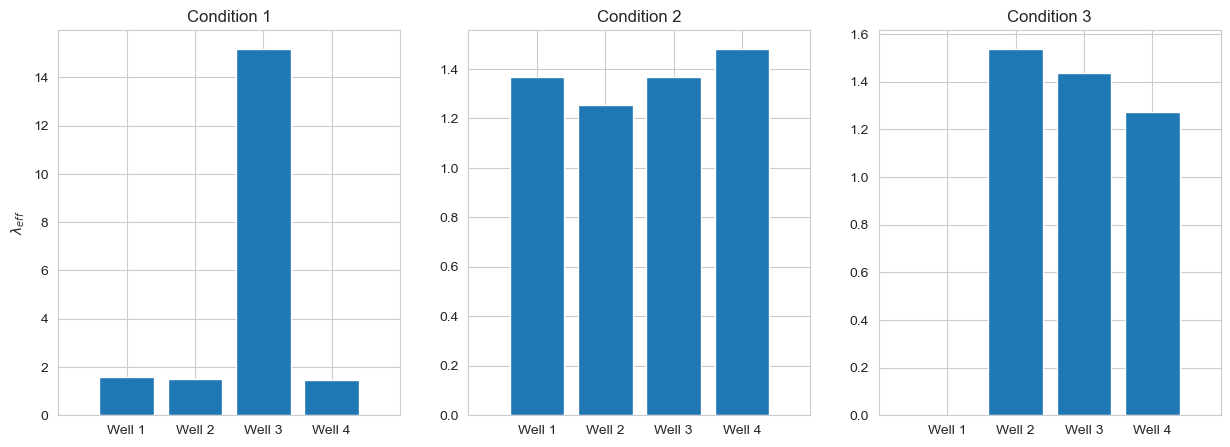

In [9]:
## Effective dimensionalities
def gather_dimensionality(data):
    lambda_eff = []
    for well in data:
        if well is not None:
            lambda_eff.append(well['states'].effective_dimensionality(plot=False, display=True, save=False))
        else:
            lambda_eff.append(np.nan)
    return lambda_eff


fig, ax = plt.subplots(1, 3, figsize=[15, 5])
ax[0].bar(xpos, gather_dimensionality(condition1))
ax[0].set_xticks(xpos)
ax[0].set_xticklabels(labels)
ax[0].set_xlim([0, 5])
ax[0].set_ylabel(r'$\lambda_{eff}$')
ax[0].set_title('Condition 1')
ax[1].bar(xpos, gather_dimensionality(condition2))
ax[1].set_xticks(xpos)
ax[1].set_xticklabels(labels)
ax[1].set_xlim([0, 5])
# ax[1].set_ylabel(r'$\lambda_{eff}$')
ax[1].set_title('Condition 2')
ax[2].bar(xpos, gather_dimensionality(condition3))
ax[2].set_xticks(xpos)
ax[2].set_xticklabels(labels)
ax[2].set_xlim([0, 5])
# ax[2].set_ylabel(r'$\lambda_{eff}$')
ax[2].set_title('Condition 3')
plt.savefig("./plots/single_well_outliers_dimensionality.pdf")

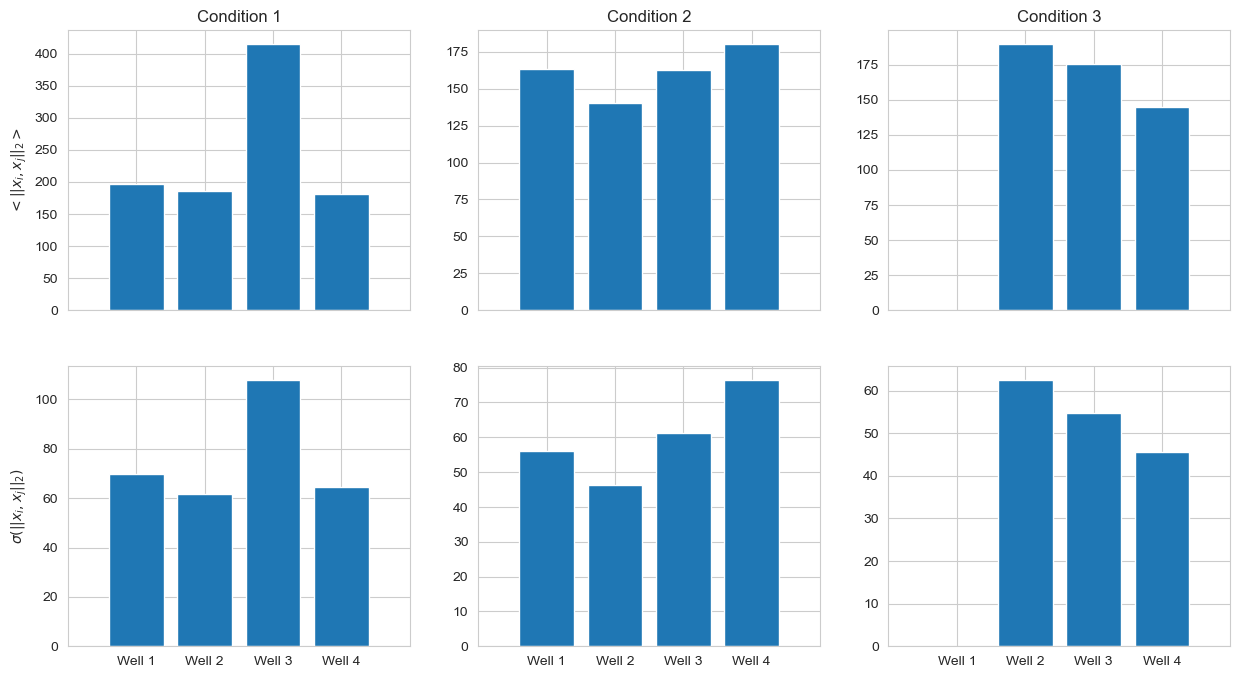

In [10]:
## Spatial and temporal structure
def gather_spatial_structure(data):
    mean_euc_dist = []
    std_euc_dist = []
    for well in data:
        if well is not None:
            mean_euc_dist.append(well['euc_dist'].mean())
            std_euc_dist.append(well['euc_dist'].std())
        else:
            mean_euc_dist.append(np.nan)
            std_euc_dist.append(np.nan)
    return mean_euc_dist, std_euc_dist


fig, ax = plt.subplots(2, 3, figsize=[15, 8])
means, stds = gather_spatial_structure(condition1)
ax[0,0].bar(xpos, means)
ax[0,0].set_xticks(xpos)
ax[0,0].set_xticklabels([])
ax[0,0].set_xlim([0, 5])
ax[0,0].set_ylabel(r'$<||x_{i}, x_{j}||_{2}>$')
ax[0,0].set_title('Condition 1')
ax[1,0].bar(xpos, stds)
ax[1,0].set_xticks(xpos)
ax[1,0].set_xticklabels(labels)
ax[1,0].set_xlim([0, 5])
ax[1,0].set_ylabel(r'$\sigma(||x_{i}, x_{j}||_{2})$')
means, stds = gather_spatial_structure(condition2)
ax[0,1].bar(xpos, means)
ax[0,1].set_xticks(xpos)
ax[0,1].set_xticklabels([])
ax[0,1].set_xlim([0, 5])
# ax[1].set_ylabel(r'$\lambda_{eff}$')
ax[0,1].set_title('Condition 2')
ax[1,1].bar(xpos, stds)
ax[1,1].set_xticks(xpos)
ax[1,1].set_xticklabels(labels)
ax[1,1].set_xlim([0, 5])
# ax[4].set_ylabel(r'$\sigma(||x_{i}, x_{j}||_{2})$')
means, stds = gather_spatial_structure(condition3)
ax[0,2].bar(xpos, means)
ax[0,2].set_xticks(xpos)
ax[0,2].set_xticklabels([])
ax[0,2].set_xlim([0, 5])
# ax[2].set_ylabel(r'$\lambda_{eff}$')
ax[0,2].set_title('Condition 3')
ax[1,2].bar(xpos, stds)
ax[1,2].set_xticks(xpos)
ax[1,2].set_xticklabels(labels)
ax[1,2].set_xlim([0, 5])

plt.savefig("./plots/single_well_outliers_spatial_structure.pdf")

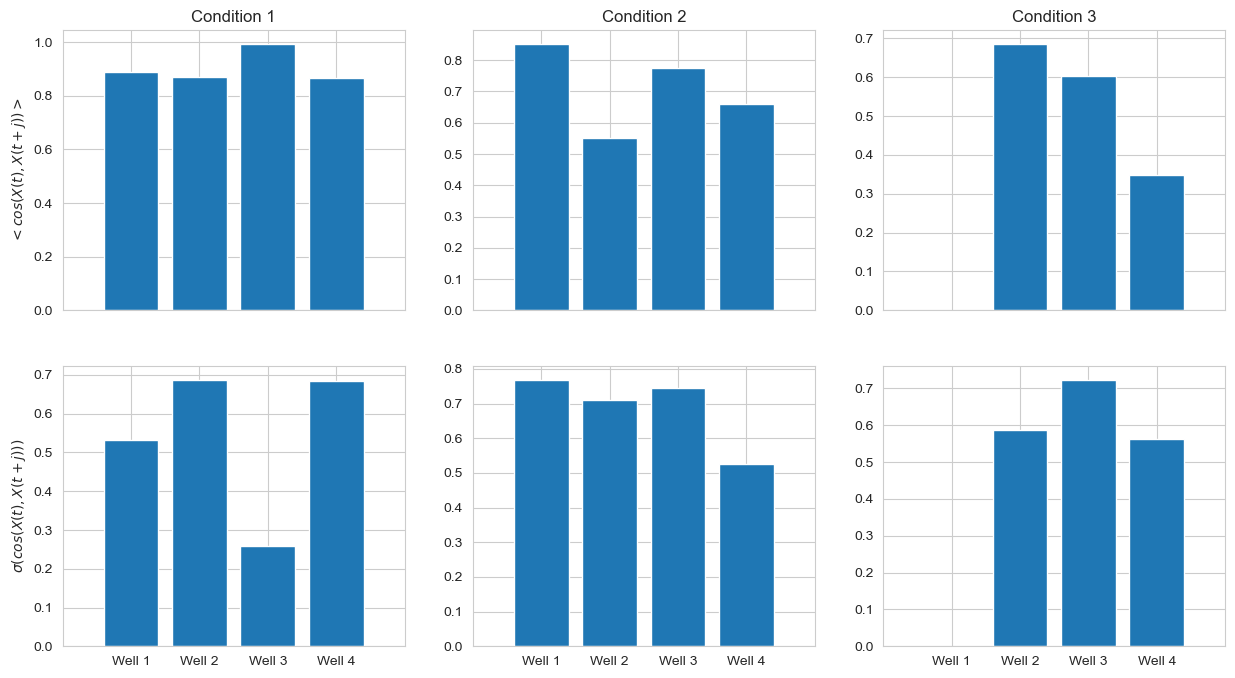

In [11]:
from auxiliary import pairwise_distances

def gather_temporal_structure(data):
    mean_euc_dist = []
    std_euc_dist = []
    for well in data:
        if well is not None:
            X = well['states'].matrix[:, ::10].T
            D = pairwise_distances(X, metric='cosine', plot=False, display=False, save=False)
            mean_euc_dist.append(D.mean())
            std_euc_dist.append(D.std())
        else:
            mean_euc_dist.append(np.nan)
            std_euc_dist.append(np.nan)
    return mean_euc_dist, std_euc_dist


fig, ax = plt.subplots(2, 3, figsize=[15, 8])
means, stds = gather_temporal_structure(condition1)
ax[0,0].bar(xpos, means)
ax[0,0].set_xticks(xpos)
ax[0,0].set_xticklabels([])
ax[0,0].set_xlim([0, 5])
ax[0,0].set_ylabel(r'$<cos(X(t), X(t+j))>$')
ax[0,0].set_title('Condition 1')
ax[1,0].bar(xpos, stds)
ax[1,0].set_xticks(xpos)
ax[1,0].set_xticklabels(labels)
ax[1,0].set_xlim([0, 5])
ax[1,0].set_ylabel(r'$\sigma(cos(X(t), X(t+j)))$')
means, stds = gather_temporal_structure(condition2)
ax[0,1].bar(xpos, means)
ax[0,1].set_xticks(xpos)
ax[0,1].set_xticklabels([])
ax[0,1].set_xlim([0, 5])
# ax[1].set_ylabel(r'$\lambda_{eff}$')
ax[0,1].set_title('Condition 2')
ax[1,1].bar(xpos, stds)
ax[1,1].set_xticks(xpos)
ax[1,1].set_xticklabels(labels)
ax[1,1].set_xlim([0, 5])
# ax[4].set_ylabel(r'$\sigma(||x_{i}, x_{j}||_{2})$')
means, stds = gather_temporal_structure(condition3)
ax[0,2].bar(xpos, means)
ax[0,2].set_xticks(xpos)
ax[0,2].set_xticklabels([])
ax[0,2].set_xlim([0, 5])
# ax[2].set_ylabel(r'$\lambda_{eff}$')
ax[0,2].set_title('Condition 3')
ax[1,2].bar(xpos, stds)
ax[1,2].set_xticks(xpos)
ax[1,2].set_xticklabels(labels)
ax[1,2].set_xlim([0, 5])

plt.savefig("./plots/single_well_outliers_temporal_structure.pdf")

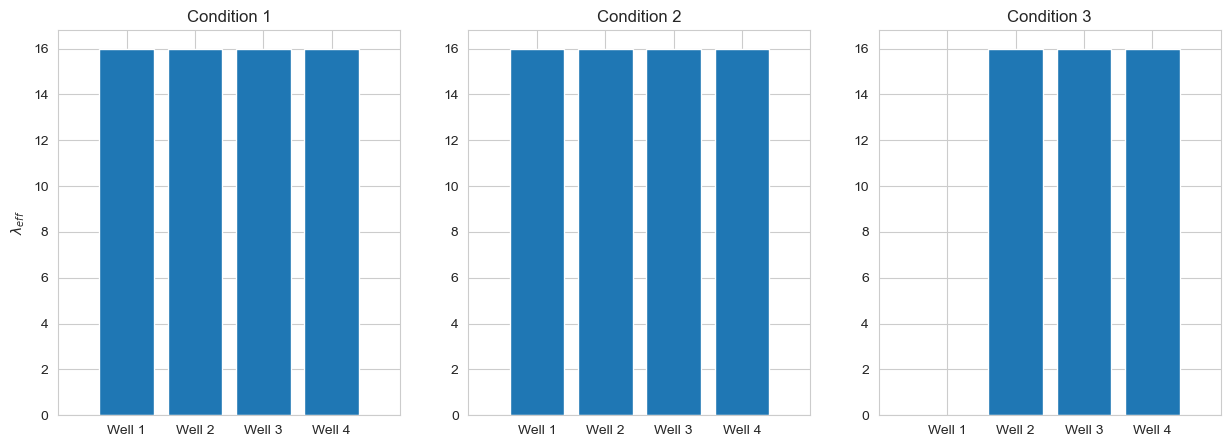

In [12]:
# Rank
def gather_rank(data):
    lambda_eff = []
    for well in data:
        if well is not None:
            lambda_eff.append(well['rank'])
        else:
            lambda_eff.append(np.nan)
    return lambda_eff


fig, ax = plt.subplots(1, 3, figsize=[15, 5])
ax[0].bar(xpos, gather_rank(condition1))
ax[0].set_xticks(xpos)
ax[0].set_xticklabels(labels)
ax[0].set_xlim([0, 5])
ax[0].set_ylabel(r'$\lambda_{eff}$')
ax[0].set_title('Condition 1')
ax[1].bar(xpos, gather_rank(condition2))
ax[1].set_xticks(xpos)
ax[1].set_xticklabels(labels)
ax[1].set_xlim([0, 5])
# ax[1].set_ylabel(r'$\lambda_{eff}$')
ax[1].set_title('Condition 2')
ax[2].bar(xpos, gather_rank(condition3))
ax[2].set_xticks(xpos)
ax[2].set_xticklabels(labels)
ax[2].set_xlim([0, 5])
# ax[2].set_ylabel(r'$\lambda_{eff}$')
ax[2].set_title('Condition 3')
plt.savefig("./plots/single_well_outliers_rank.pdf")

In [18]:
# Compare
def gather_dimensionality(data):
    lambda_eff = []
    for well in data:
        if well is not None:
            lambda_eff.append(well['states'].effective_dimensionality(plot=False, display=False, save=False))
        else:
            lambda_eff.append(np.nan)
    return lambda_eff

dim1 = gather_dimensionality(condition1)
dim1[2] = np.nan
effective_dimensionality = pd.DataFrame(
    {'N1': dim1, 'N2': gather_dimensionality(condition2), 'N3': gather_dimensionality(condition3)}
)

def gather_spatial_structure(data):
    mean_euc_dist = []
    std_euc_dist = []
    for well in data:
        if well is not None:
            mean_euc_dist.append(well['euc_dist'].mean())
            std_euc_dist.append(well['euc_dist'].std())
        else:
            mean_euc_dist.append(np.nan)
            std_euc_dist.append(np.nan)
    return mean_euc_dist, std_euc_dist

spat1_means, spat1_stds = gather_spatial_structure(condition1)
spat1_means[2] = np.nan
spat2_means, spat2_stds = gather_spatial_structure(condition2)
spat3_means, spat3_stds = gather_spatial_structure(condition3)
spatial_structure = pd.DataFrame(
    {'N1': spat1_means, 'N2': spat2_means, 'N3': spat3_means}
)

def gather_temporal_structure(data):
    mean_euc_dist = []
    std_euc_dist = []
    for well in data:
        if well is not None:
            X = well['states'].matrix[:, ::10].T
            D = pairwise_distances(X, metric='cosine', plot=False, display=False, save=False)
            mean_euc_dist.append(D.mean())
            std_euc_dist.append(D.std())
        else:
            mean_euc_dist.append(np.nan)
            std_euc_dist.append(np.nan)
    return mean_euc_dist, std_euc_dist
temp1_means, temp1_stds = gather_temporal_structure(condition1)
temp1_means[2] = np.nan
temp2_means, temp2_stds = gather_temporal_structure(condition2)
temp3_means, temp3_stds = gather_temporal_structure(condition3)
temporal_structure = pd.DataFrame(
    {'N1': temp1_means, 'N2': temp2_means, 'N3': temp3_means}
)



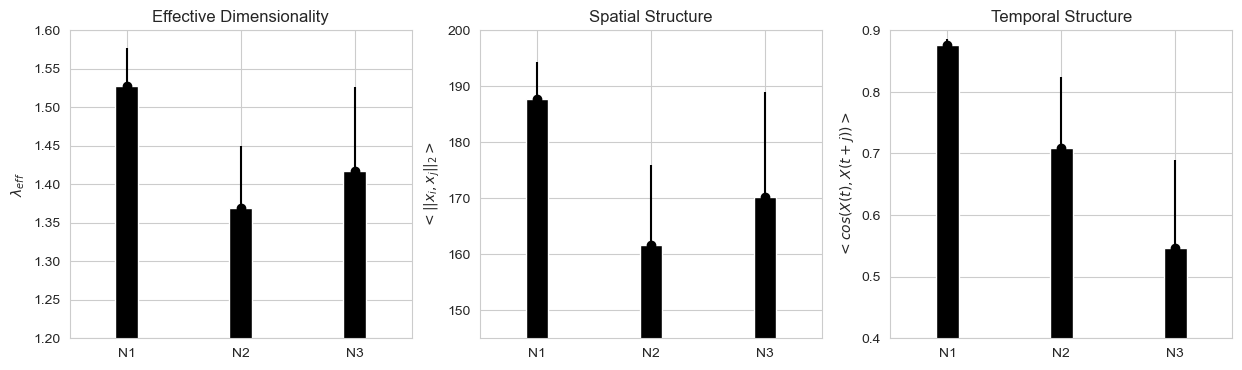

In [30]:
fig, ax = plt.subplots(1, 3, figsize=[15, 4])
ax[0].errorbar([1, 2, 3], np.nanmean(effective_dimensionality, axis=0), yerr=np.nanstd(effective_dimensionality, axis=0), fmt='ok')
ax[0].bar([1, 2, 3], np.nanmean(effective_dimensionality, axis=0), width=0.2, color='k')
ax[0].set_xlim([0.5, 3.5])
ax[0].set_ylim([1.2, 1.6])
ax[0].set_ylabel(r'$\lambda_{eff}$')
ax[0].set_title("Effective Dimensionality")
ax[0].set_xticks([1, 2, 3])
ax[0].set_xticklabels(['N1', 'N2', 'N3'])
ax[1].errorbar([1, 2, 3], np.nanmean(spatial_structure, axis=0), yerr=np.nanstd(spatial_structure, axis=0), fmt='ok')
ax[1].bar([1, 2, 3], np.nanmean(spatial_structure, axis=0), width=0.2, color='k')
ax[1].set_xlim([0.5, 3.5])
ax[1].set_ylim([145, 200])
ax[1].set_title("Spatial Structure")
ax[1].set_ylabel(r'$<||x_{i}, x_{j}||_{2}>$')
ax[1].set_xticks([1, 2, 3])
ax[1].set_xticklabels(['N1', 'N2', 'N3'])
ax[2].errorbar([1, 2, 3], np.nanmean(temporal_structure, axis=0), yerr=np.nanstd(temporal_structure, axis=0), fmt='ok')
ax[2].bar([1, 2, 3], np.nanmean(temporal_structure, axis=0), width=0.2, color='k')
ax[2].set_xlim([0.5, 3.5])
ax[2].set_ylim([0.4, 0.9])
ax[2].set_title("Temporal Structure")
ax[2].set_ylabel(r'$<cos(X(t), X(t+j))>$')
ax[2].set_xticks([1, 2, 3])
ax[2].set_xticklabels(['N1', 'N2', 'N3'])
plt.savefig('./plots/conditions_comparisons_activity.pdf')

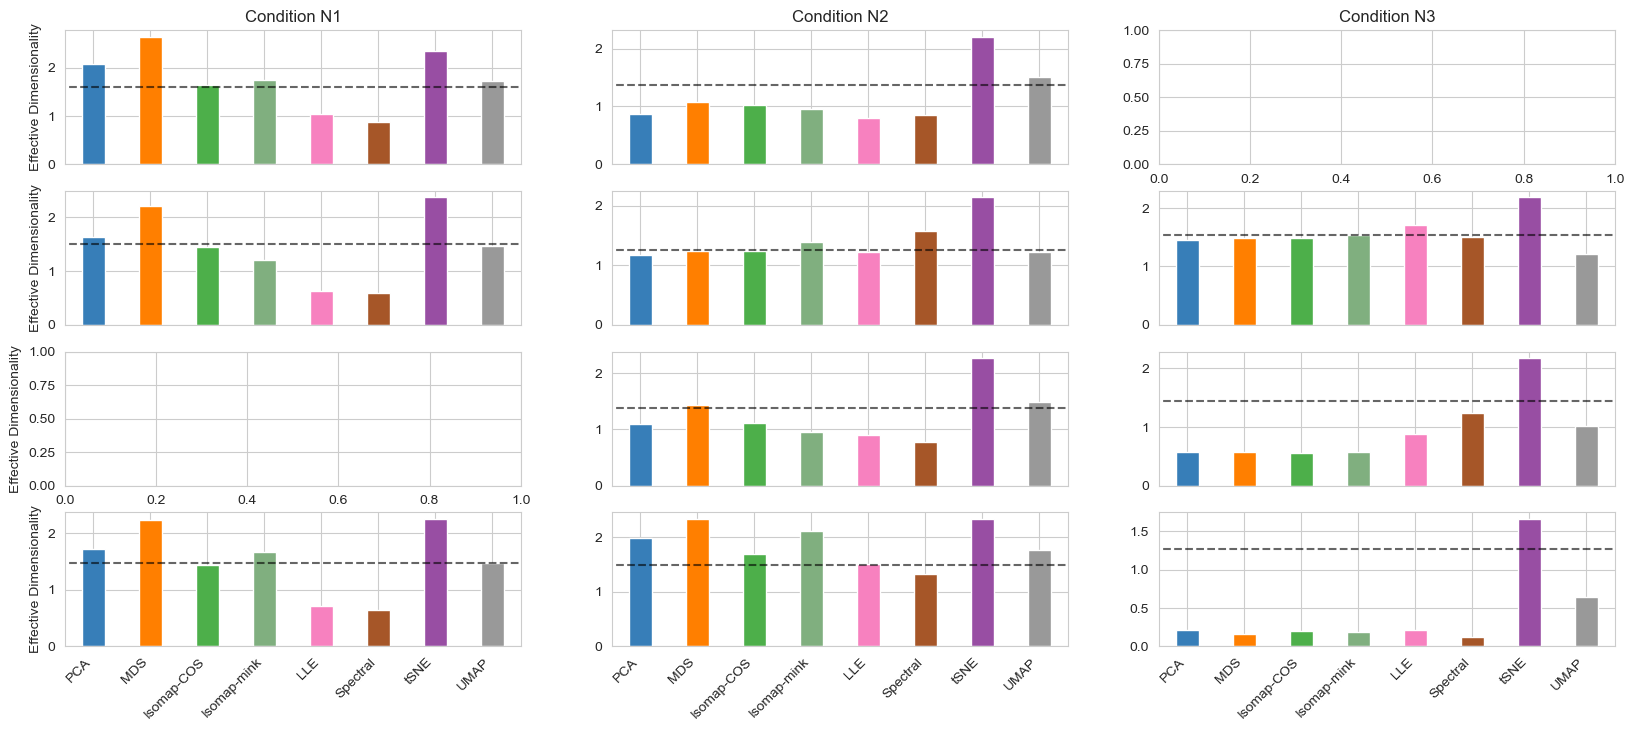

In [75]:
# Errors and fit 

condition1 = [condition1_well1, condition1_well2, None, condition1_well4]
condition2 = [condition2_well1, condition2_well2, condition2_well3, condition2_well4]
condition3 = [None, condition3_well2, condition3_well3, condition3_well4]

method_label = ['PCA', 'MDS', 'Isomap-COS', 'Isomap-mink', 'LLE', 'Spectral', 'tSNE', 'UMAP']
colb = ['#377eb8', '#ff7f00', '#4daf4a', '#80af7f',  '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']

# 1) estimates of effective dimensionality:

fig, ax = plt.subplots(4, 3, figsize=[20, 8])
data = condition1_well2

for i, condition in enumerate([condition1, condition2, condition3]):
    for j, well in enumerate(condition):
        if well is not None:
            for k, method in enumerate(method_label):
                # print(i, j, k)
                ax[j, i].bar(k+1, well['dimensionality'][method], width=0.4, color=colb[k])
            ax[j, i].plot(np.arange(len(method_label)+2), np.ones_like(np.arange(len(method_label)+2))*well['states'].effective_dimensionality(plot=False, display=False, save=False), '--k', alpha=0.6)
            ax[j, i].set_xticklabels([])
            ax[j, i].set_xlim([0.5, 8.5])
ax[0, 0].set_ylabel("Effective Dimensionality")
ax[0, 0].set_title("Condition N1")
ax[0, 1].set_title("Condition N2")
ax[0, 2].set_title("Condition N3")
ax[1, 0].set_ylabel("Effective Dimensionality")
ax[2, 0].set_ylabel("Effective Dimensionality")
ax[3, 0].set_ylabel("Effective Dimensionality")
ax[3, 0].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
ax[3, 0].set_xticklabels(method_label, rotation = 45, ha="right")
ax[3, 1].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
ax[3, 1].set_xticklabels(method_label, rotation = 45, ha="right")
ax[3, 2].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
ax[3, 2].set_xticklabels(method_label, rotation = 45, ha="right")

# plt.show()
plt.savefig("./plots/dimensionalities_emb.pdf")
# for m in method_label:
#     
#     
#     print(m, data['dimensionality'][m])
#     print(data['states'].effective_dimensionality(plot=False, display=False, save=False))


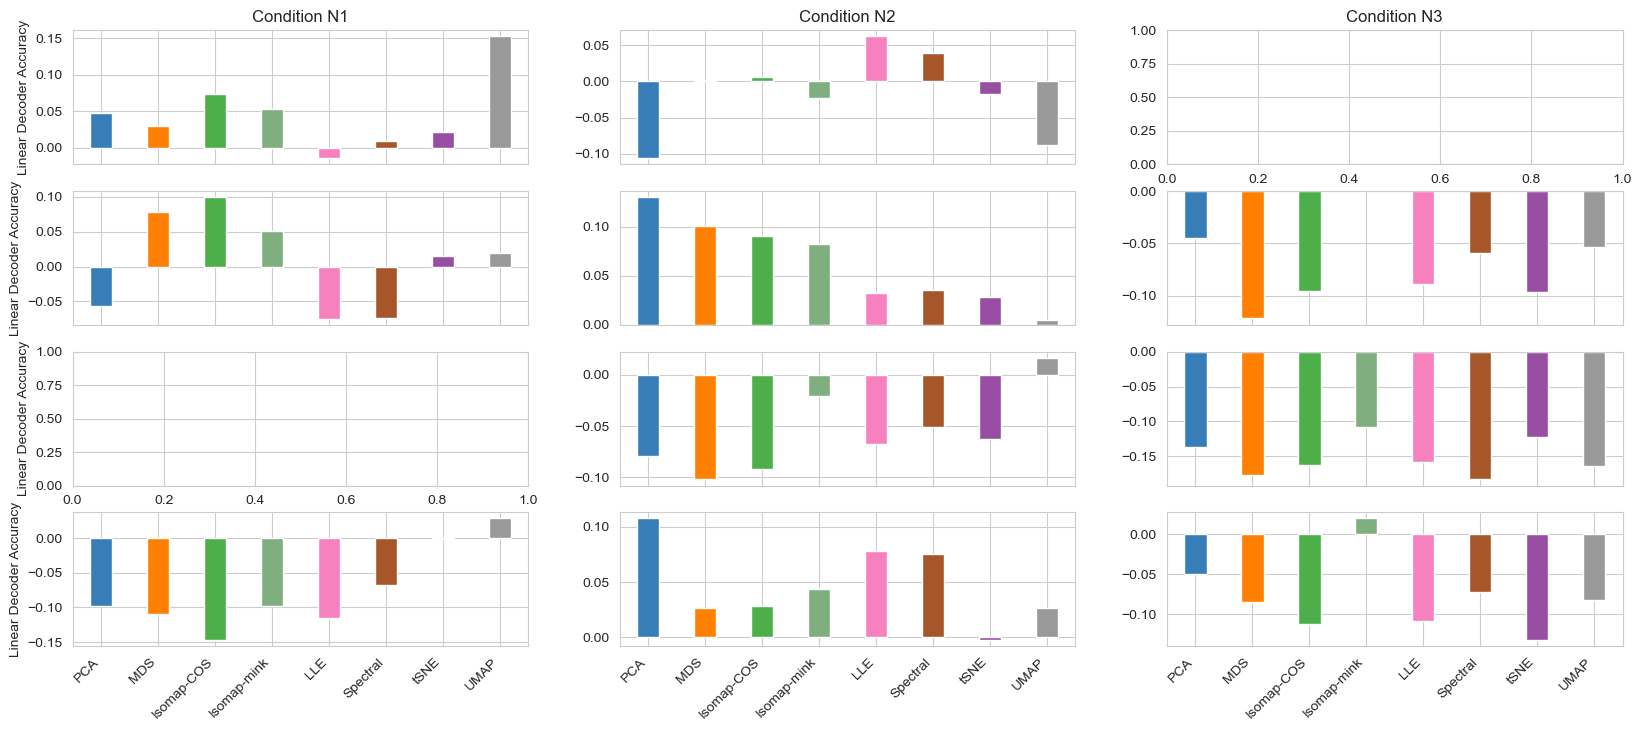

In [64]:
# 2) decoder accuracy:

fig, ax = plt.subplots(4, 3, figsize=[20, 8])
data = condition1_well2

for i, condition in enumerate([condition1, condition2, condition3]):
    for j, well in enumerate(condition):
        if well is not None:
            for k, method in enumerate(method_label):
                # print(i, j, k)
                ax[j, i].bar(k+1, well['reconstruction_accuracy'][method].mean(), width=0.4, color=colb[k])
                ax[j, i].set_xticklabels([])
            ax[j, i].set_xlim([0.5, 8.5])
            # ax[j, i].set_ylim()
ax[0, 0].set_ylabel("Linear Decoder Accuracy")
ax[0, 0].set_title("Condition N1")
ax[0, 1].set_title("Condition N2")
ax[0, 2].set_title("Condition N3")
ax[1, 0].set_ylabel("Linear Decoder Accuracy")
ax[2, 0].set_ylabel("Linear Decoder Accuracy")
ax[3, 0].set_ylabel("Linear Decoder Accuracy")
ax[3, 0].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
ax[3, 0].set_xticklabels(method_label, rotation = 45, ha="right")
ax[3, 1].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
ax[3, 1].set_xticklabels(method_label, rotation = 45, ha="right")
ax[3, 2].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
ax[3, 2].set_xticklabels(method_label, rotation = 45, ha="right")

plt.show()

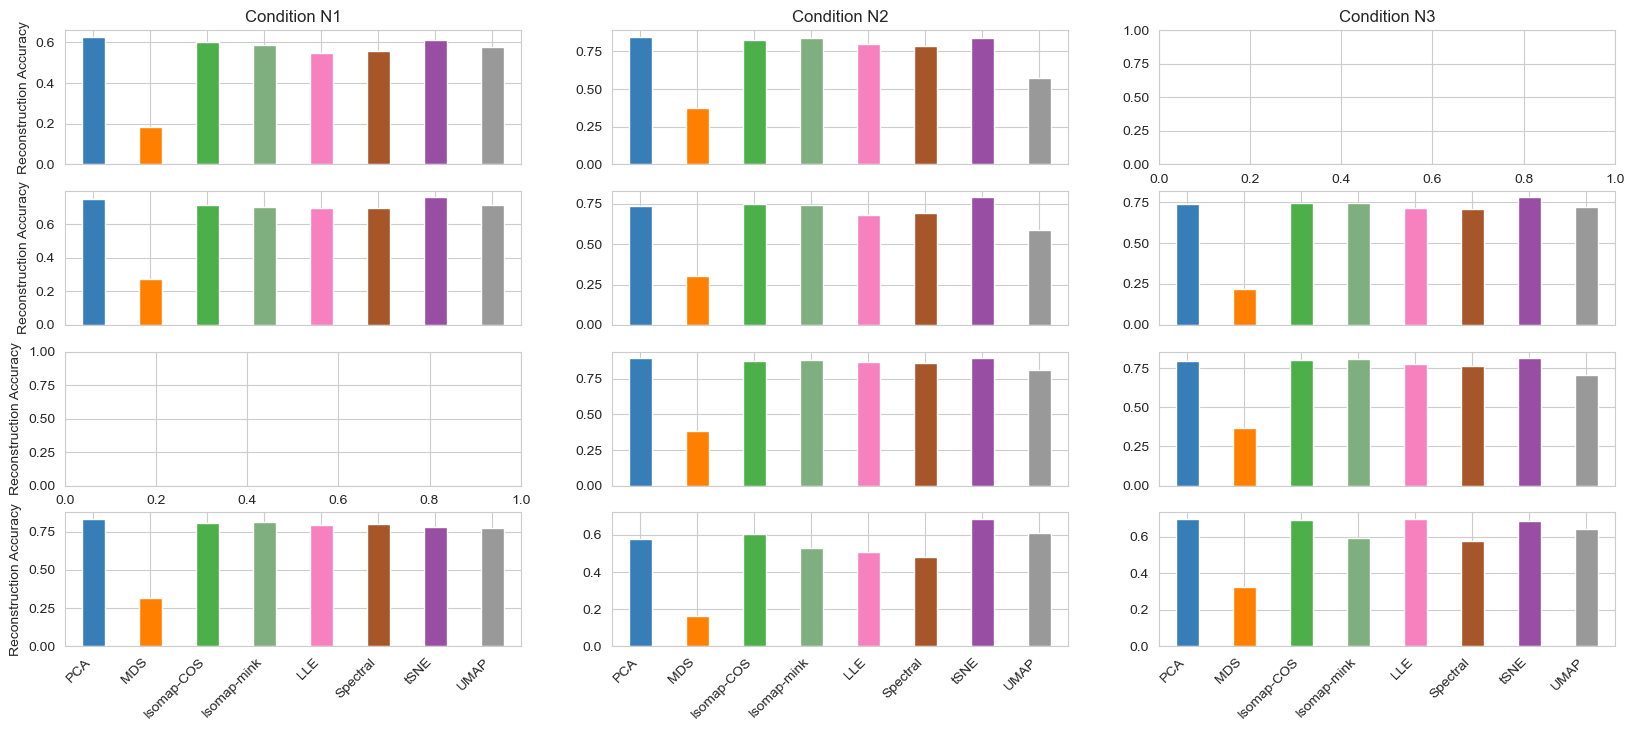

In [73]:
# 3) reconstruction accuracy:

fig, ax = plt.subplots(4, 3, figsize=[20, 8])
data = condition1_well2

for i, condition in enumerate([condition1, condition2, condition3]):
    for j, well in enumerate(condition):
        if well is not None:
            for k, method in enumerate(method_label):
                # print(i, j, k)
                ax[j, i].bar(k+1, well['reconstruction_precision'][method].mean(), width=0.4, color=colb[k])
                ax[j, i].set_xticklabels([])
            ax[j, i].set_xlim([0.5, 8.5])
            # ax[j, i].set_ylim()
ax[0, 0].set_ylabel("Reconstruction Accuracy")
ax[0, 0].set_title("Condition N1")
ax[0, 1].set_title("Condition N2")
ax[0, 2].set_title("Condition N3")
ax[1, 0].set_ylabel("Reconstruction Accuracy")
ax[2, 0].set_ylabel("Reconstruction Accuracy")
ax[3, 0].set_ylabel("Reconstruction Accuracy")
ax[3, 0].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
ax[3, 0].set_xticklabels(method_label, rotation = 45, ha="right")
ax[3, 1].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
ax[3, 1].set_xticklabels(method_label, rotation = 45, ha="right")
ax[3, 2].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
ax[3, 2].set_xticklabels(method_label, rotation = 45, ha="right")

plt.savefig("./plots/reconstruction_accuracy.pdf")
plt.show()


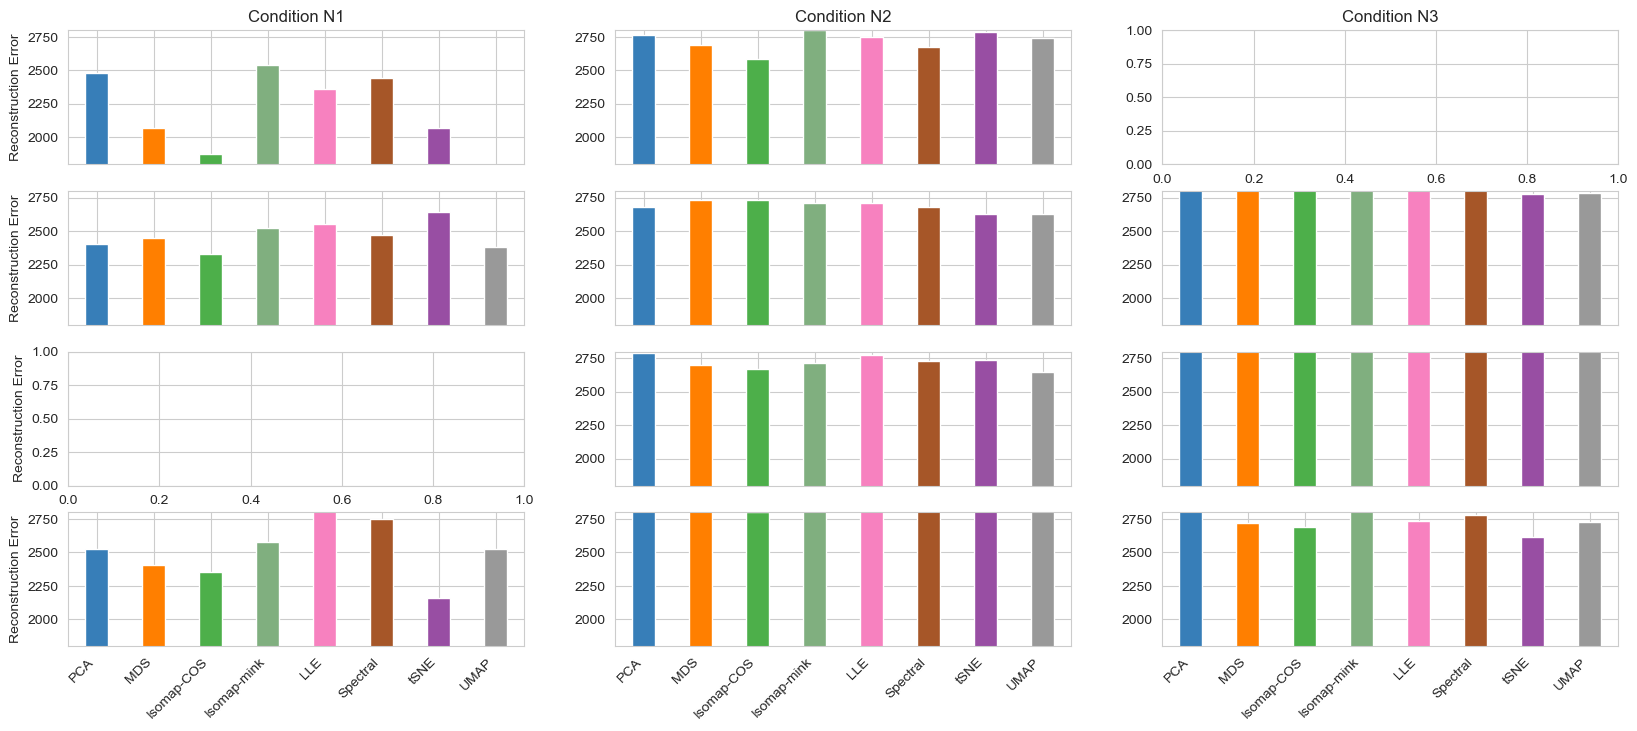

In [74]:
# 4) reconstruction error:

fig, ax = plt.subplots(4, 3, figsize=[20, 8])
data = condition1_well2

for i, condition in enumerate([condition1, condition2, condition3]):
    for j, well in enumerate(condition):
        if well is not None:
            for k, method in enumerate(method_label):
                # print(i, j, k)
                ax[j, i].bar(k+1, well['reconstruction_error'][method].mean(), width=0.4, color=colb[k])
                ax[j, i].set_xticklabels([])
            ax[j, i].set_xlim([0.5, 8.5])
            ax[j, i].set_ylim([1800., 2800.])
ax[0, 0].set_ylabel("Reconstruction Error")
ax[0, 0].set_title("Condition N1")
ax[0, 1].set_title("Condition N2")
ax[0, 2].set_title("Condition N3")
ax[1, 0].set_ylabel("Reconstruction Error")
ax[2, 0].set_ylabel("Reconstruction Error")
ax[3, 0].set_ylabel("Reconstruction Error")
ax[3, 0].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
ax[3, 0].set_xticklabels(method_label, rotation = 45, ha="right")
ax[3, 1].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
ax[3, 1].set_xticklabels(method_label, rotation = 45, ha="right")
ax[3, 2].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
ax[3, 2].set_xticklabels(method_label, rotation = 45, ha="right")
plt.savefig("./plots/reconsctruction_loss.pdf")
plt.show()

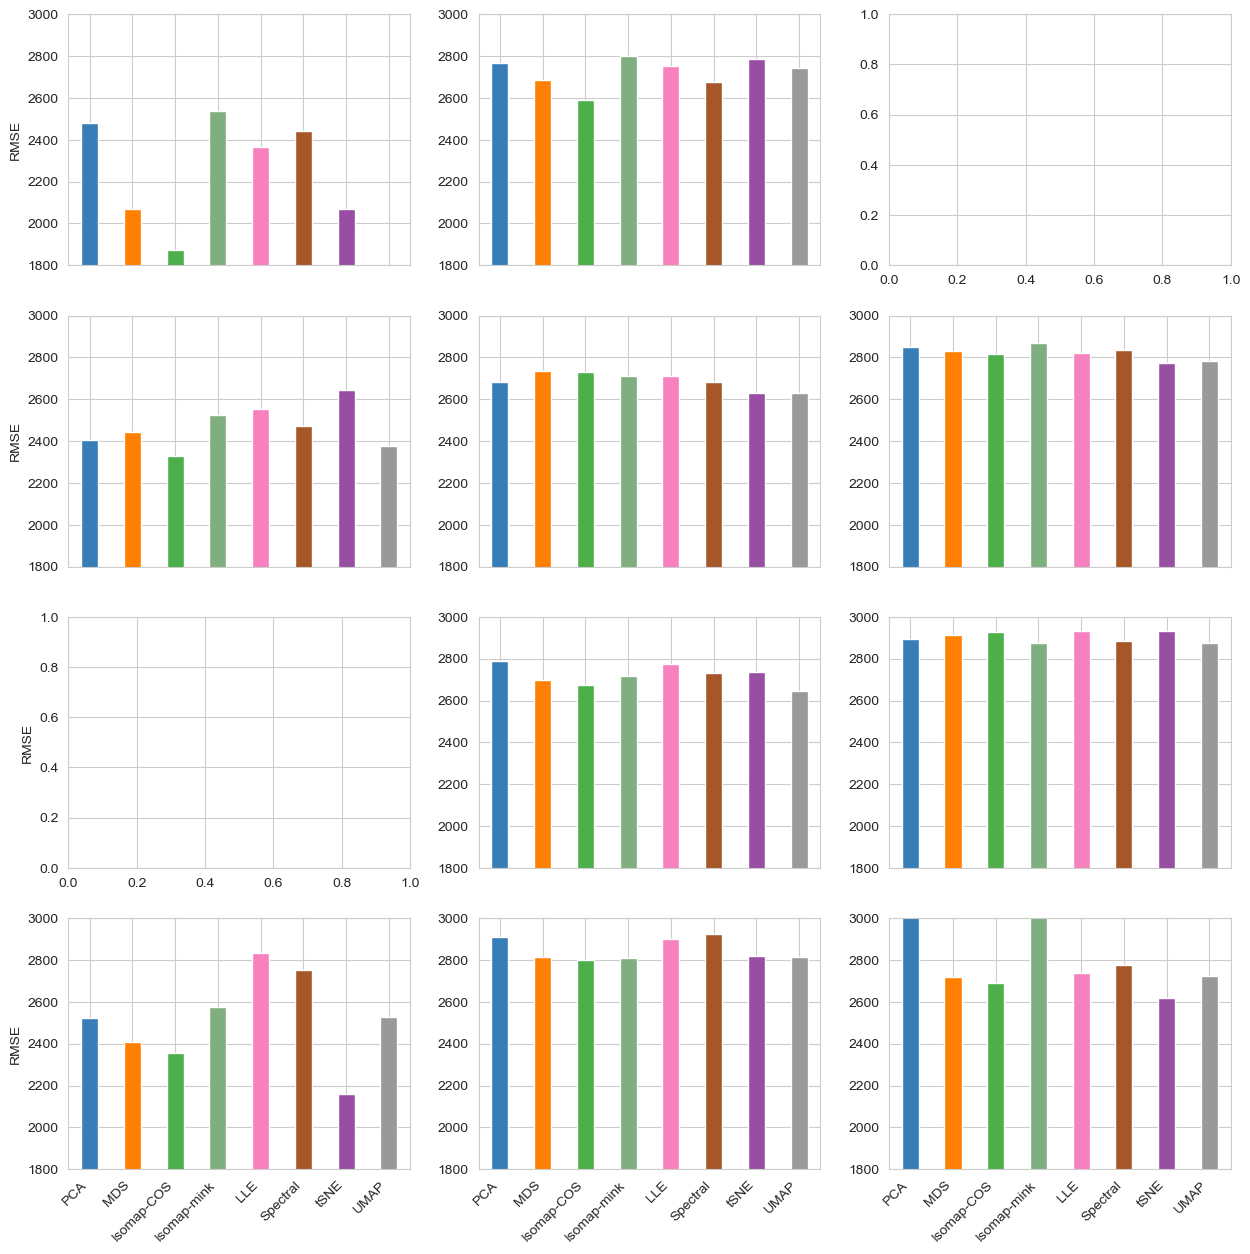

In [70]:
fig, ax = plt.subplots(4, 3, figsize=[15, 15])
data = condition1_well2

for i, condition in enumerate([condition1, condition2, condition3]):
    for j, well in enumerate(condition):
        if well is not None:
            for k, method in enumerate(method_label):
                # print(i, j, k)
                ax[j, i].bar(k+1, well['reconstruction_error'][method].mean(), width=0.4, color=colb[k])
            # ax[j, i].plot(np.arange(len(method_label)+2), np.ones_like(np.arange(len(method_label)+2))*well['states'].effective_dimensionality(plot=False, display=False, save=False), '--k', alpha=0.6)
            ax[j, i].set_xticklabels([])
            ax[j, i].set_xlim([0.5, 8.5])
            ax[j, i].set_ylim([1800., 3000.])
ax[0, 0].set_ylabel("RMSE")
ax[1, 0].set_ylabel("RMSE")
ax[2, 0].set_ylabel("RMSE")
ax[3, 0].set_ylabel("RMSE")
ax[3, 0].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
ax[3, 0].set_xticklabels(method_label, rotation = 45, ha="right")
ax[3, 1].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
ax[3, 1].set_xticklabels(method_label, rotation = 45, ha="right")
ax[3, 2].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
ax[3, 2].set_xticklabels(method_label, rotation = 45, ha="right")

plt.show()

In [ ]:
plt.figure(figsize=(8,6))
LBL = 'real'
lbl = ['PCA', 'MDS', 'Isomap-COS', 'Isomap-mink', 'LLE', 'Spectral', 'tSNE', 'UMAP']
for n, e in enumerate(lbl):
    plt.bar(n, effective_dimensionalities[e], width=.95, color=colb[n], label=e)
sns.despine()
plt.ylim(0, 3)
plt.ylabel('Dimensionality')
plt.xticks(range(len(lbl)), lbl, rotation=45)
plt.savefig('./plots/single-well/{}/{}-dimensionalities_comparison.pdf'.format(condition, well_id))

sns.set(style='ticks', font_scale=2)
plt.figure(figsize=(10,6))
for n,k in enumerate(reconstruction_accuracy):
    sem = stats.sem(reconstruction_error[k],1, nan_policy='omit')
    plt.errorbar(range(1,dims+1), np.nanmean(reconstruction_error[k],1), yerr=sem, label=k, color=colb[n], alpha=1)
plt.legend(frameon=False, loc=1)
plt.xticks(range(1,dims+1))
plt.ylabel('RMSE')
plt.xlabel('Number of dimensions')
sns.despine()
plt.savefig('./plots/single-well/{}/{}-RMSE_comparison.pdf'.format(condition, well_id))